In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 

In [3]:
### Define positive and negative points
positive_points=np.array([(-2,3),(0,1),(2,-1)])
negative_points=np.array([(-2,1),(0,-1),(2,-3)])

In [5]:
positive_points[:,0]

array([-2,  0,  2])

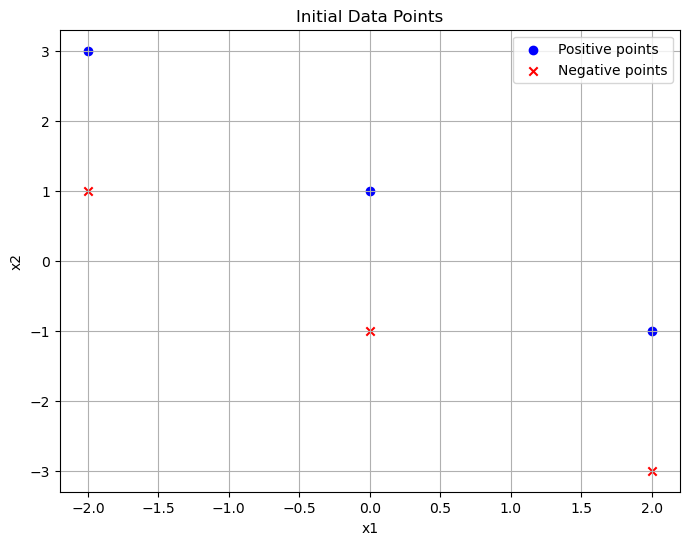

In [6]:
#### Plotting
plt.figure(figsize=(8,6))
plt.scatter(positive_points[:,0],positive_points[:,1],color='b',marker='o',label='Positive points')
plt.scatter(negative_points[:,0],negative_points[:,1],color='r',marker='x',label='Negative points')
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Initial Data Points')
plt.grid('True')
plt.show()

In [6]:
### Combine all points and labels
X=np.vstack((positive_points,negative_points))
y=np.array([1]*len(positive_points)+[-1]*len(negative_points))

In [8]:
print(X)

[[-2  3]
 [ 0  1]
 [ 2 -1]
 [-2  1]
 [ 0 -1]
 [ 2 -3]]


In [23]:
#### Perceptron algorithm
def perceptron(X,y,steps=10):
    theta=np.zeros(X.shape[1])
    theta0=0  ### Initial condition
    for t in range(steps):
        for i, xi in enumerate(X):
            if y[i] * (np.dot(xi,theta)+theta0) <= 0:
                theta+=y[i]*xi
                theta0+=y[i]
                break
            ## Plot after each iteration
            plot_decision_boundary(theta,theta0,t+1)
    return theta, theta0
            
    

In [26]:
def plot_decision_boundary(theta,theta0, iterations):
    plt.figure(figsize=(8,6))
    plt.scatter(positive_points[:,0],positive_points[:,1],color='b',marker='o',label='Positive points')
    plt.scatter(negative_points[:,0],negative_points[:,1],color='r',marker='x',label='Negative points')

    ### Plot decision boundary
    x_values=np.linspace(-3,3,2)
    ## Check for theta[1] to avoid division by zero
    if theta[1]!=0:
        y_values=-(theta[0]*x_values+theta0)/theta[1]
        plt.plot(x_values,y_values,label=f'Iteration {iterations}')
    else:
        ## Plot vertical line
        x_val=-theta0/theta[0]
        plt.axvline(x_val,label=f'Iteration {iterations}')
        


    plt.ylim(-4,4)
    plt.xlim(-3,3)
    plt.legend(loc='best')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Decision Boundary at Iteration {iterations}')
    plt.grid('True')
    plt.show()
    

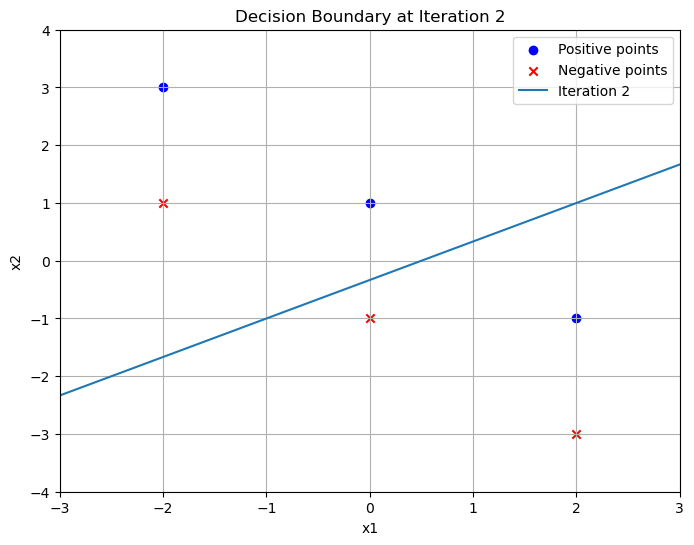

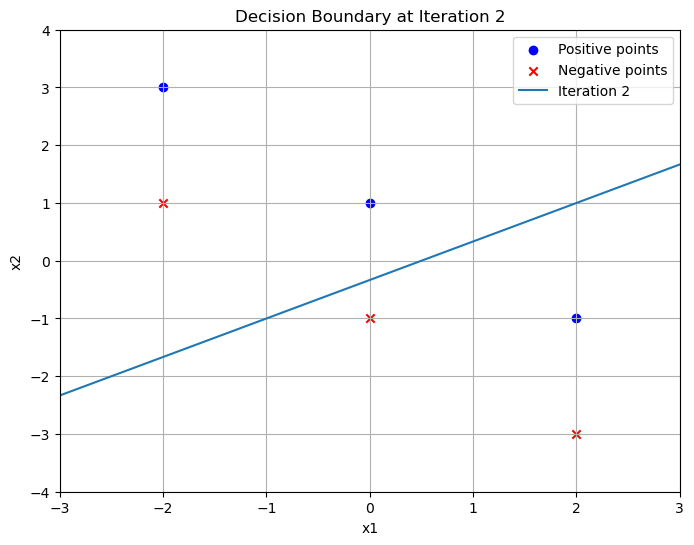

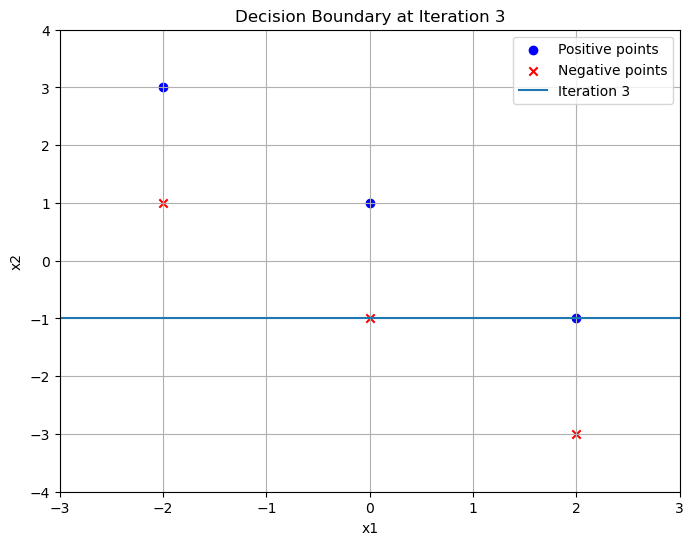

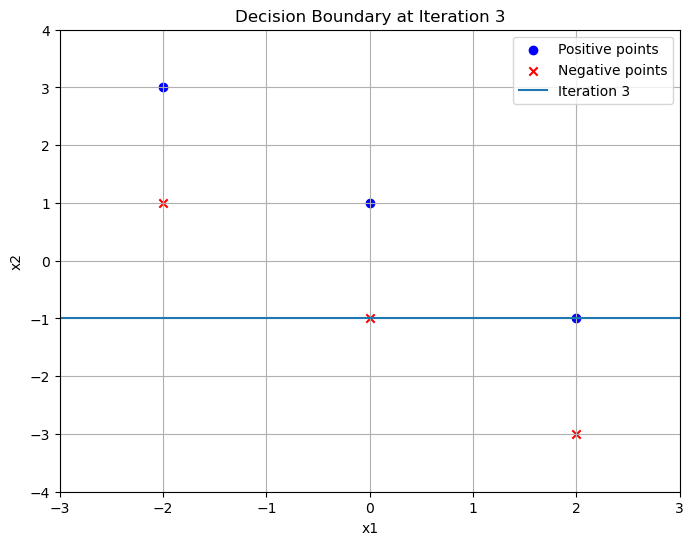

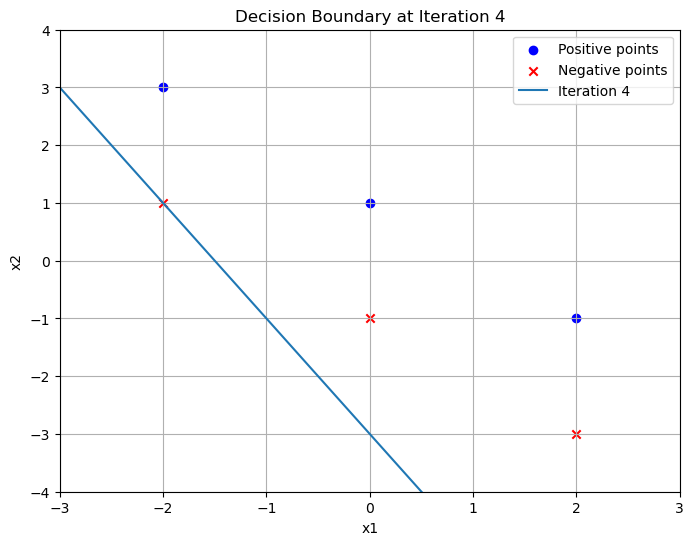

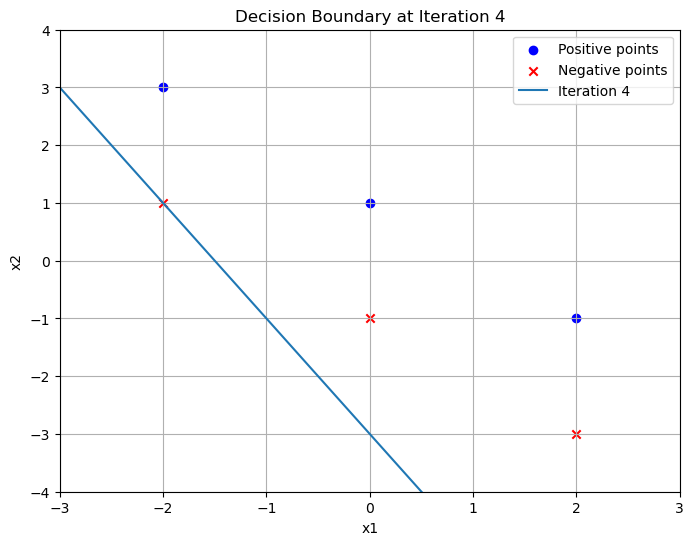

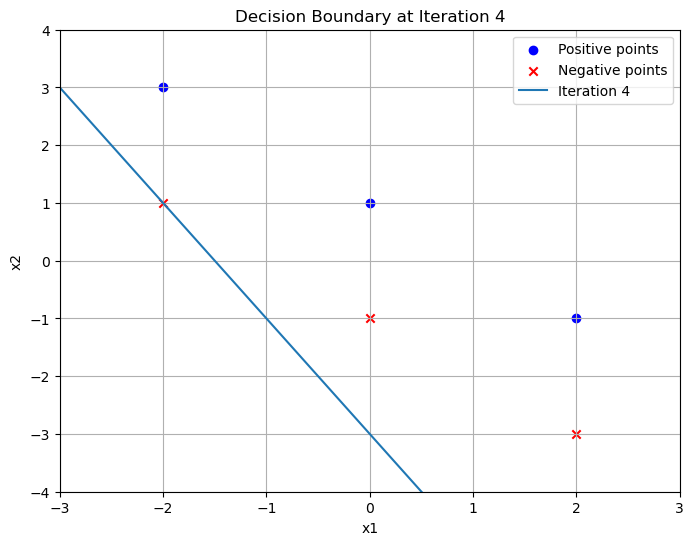

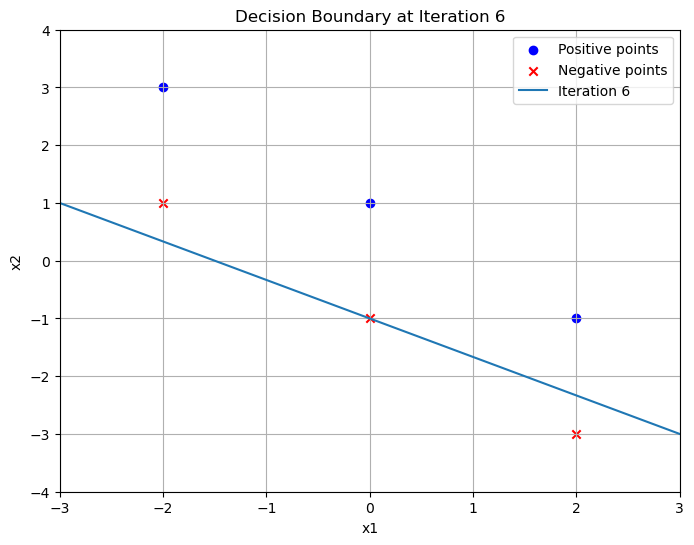

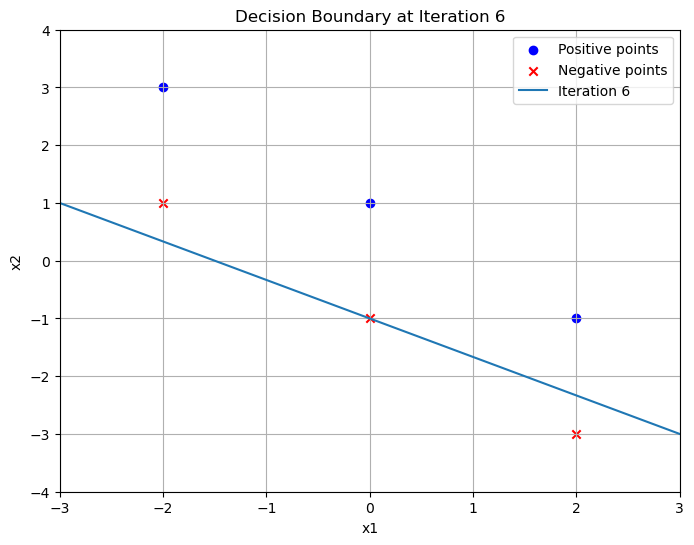

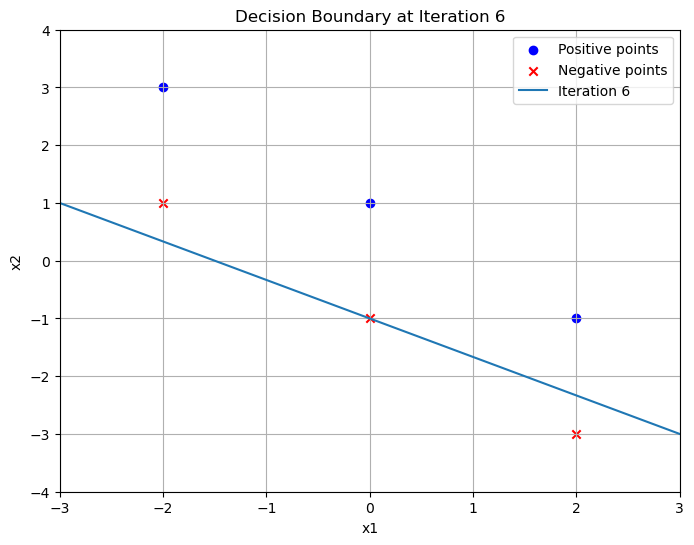

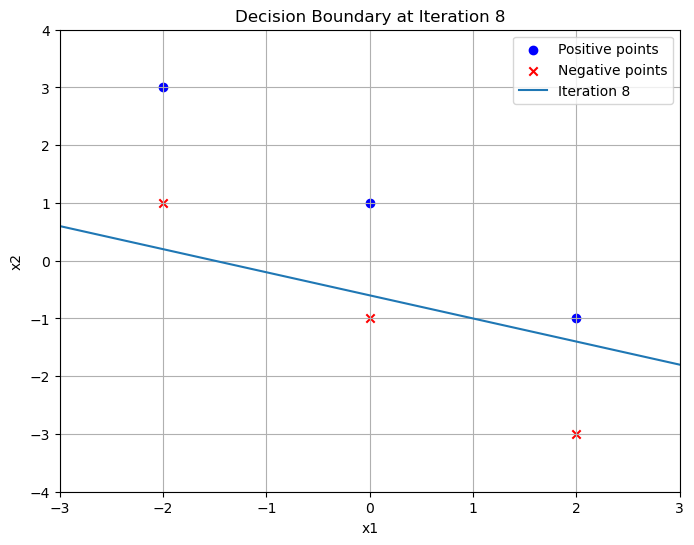

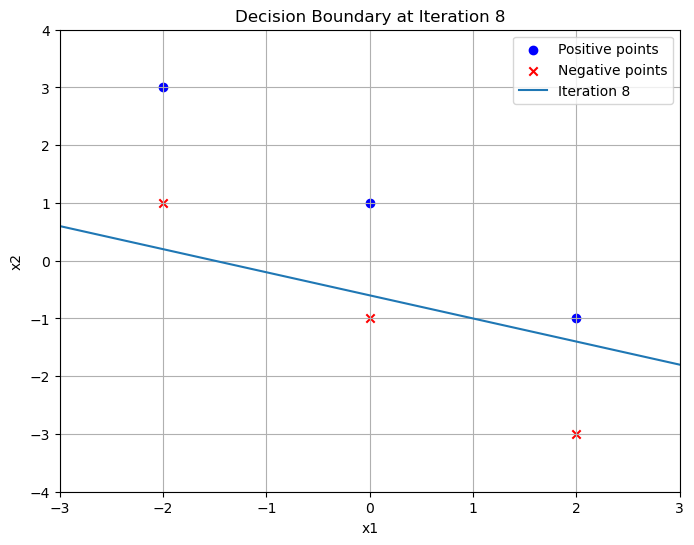

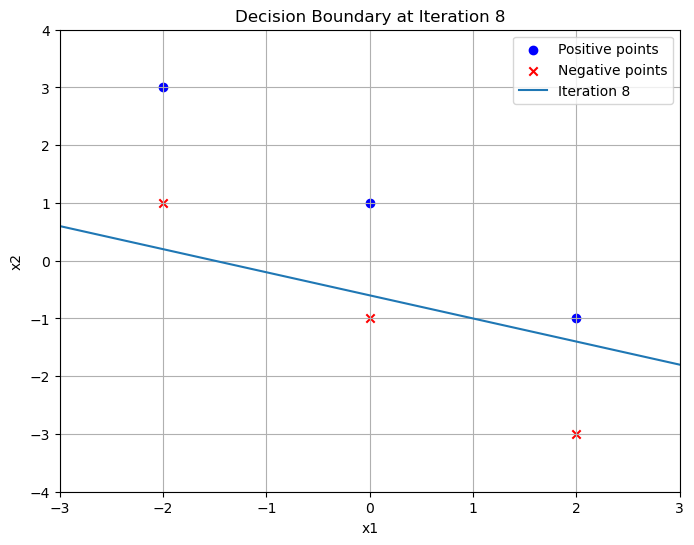

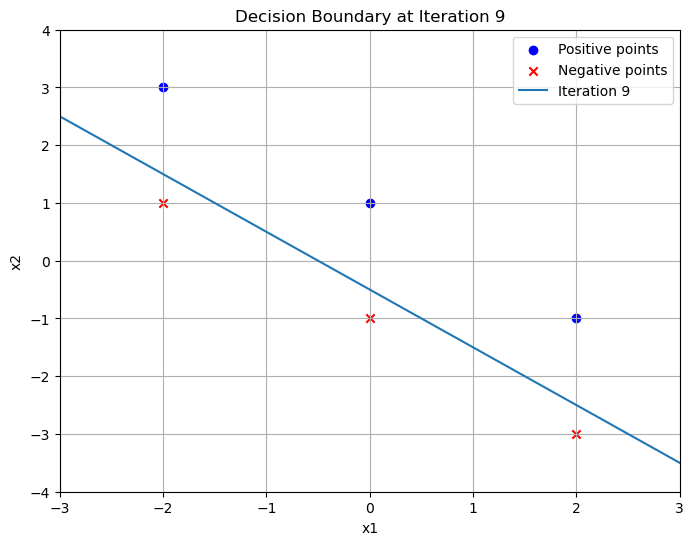

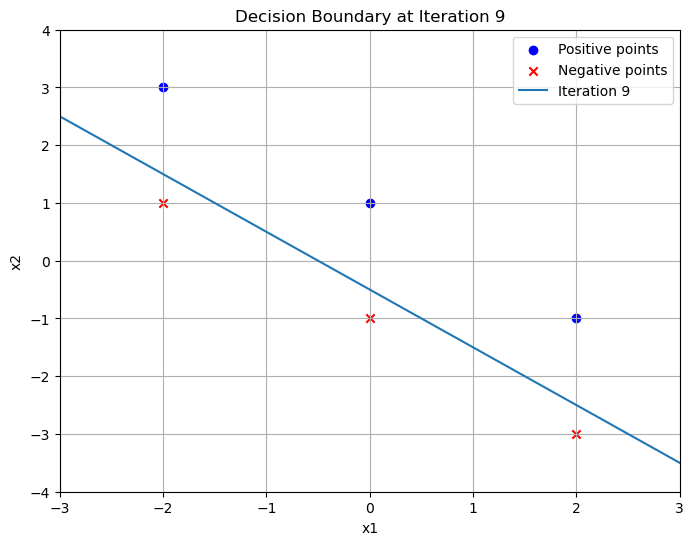

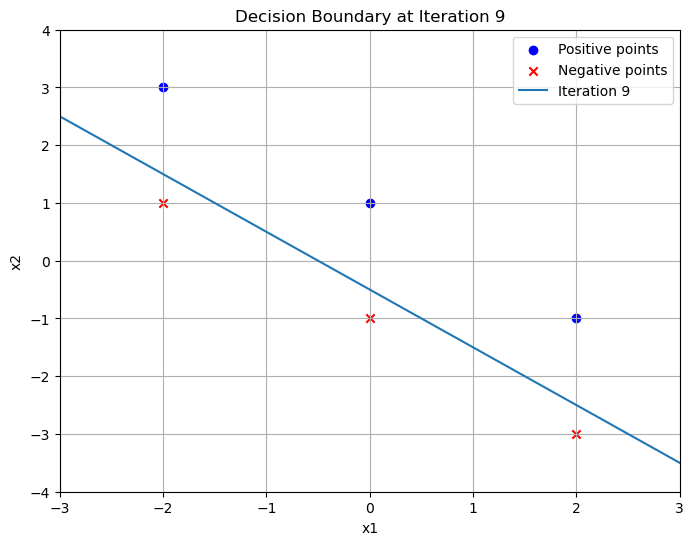

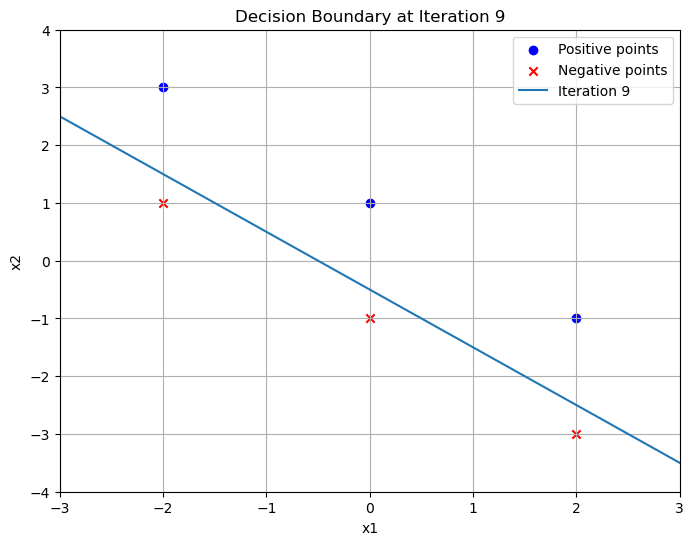

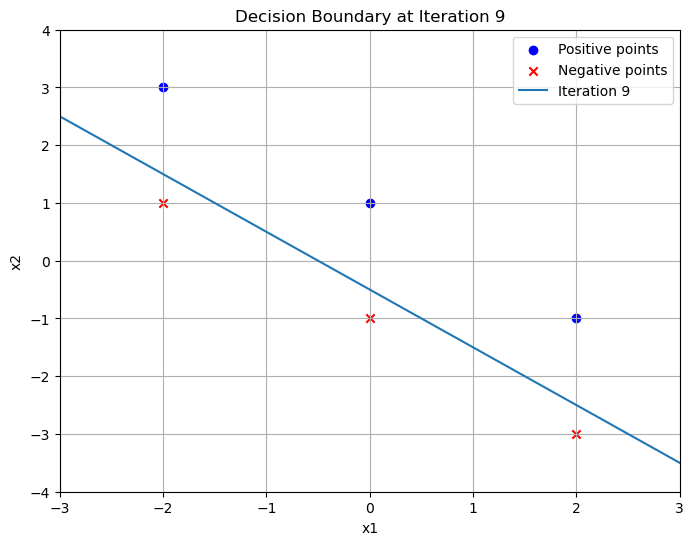

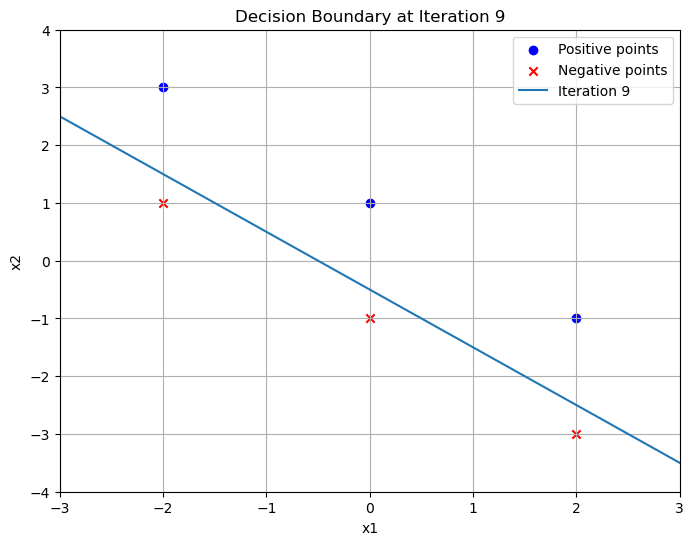

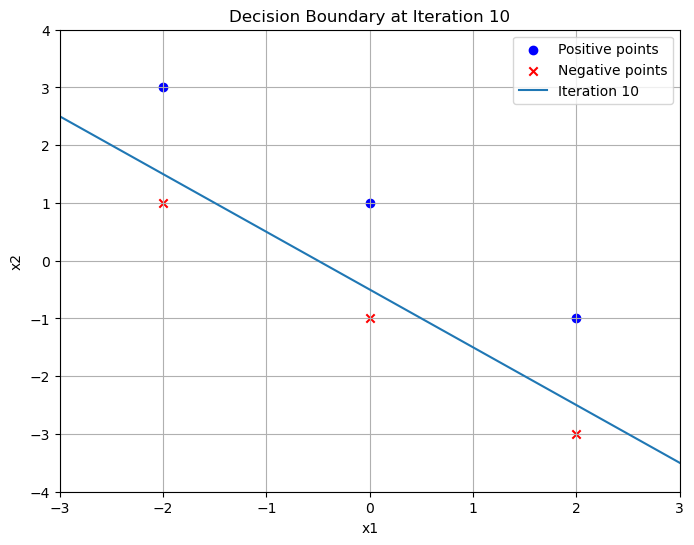

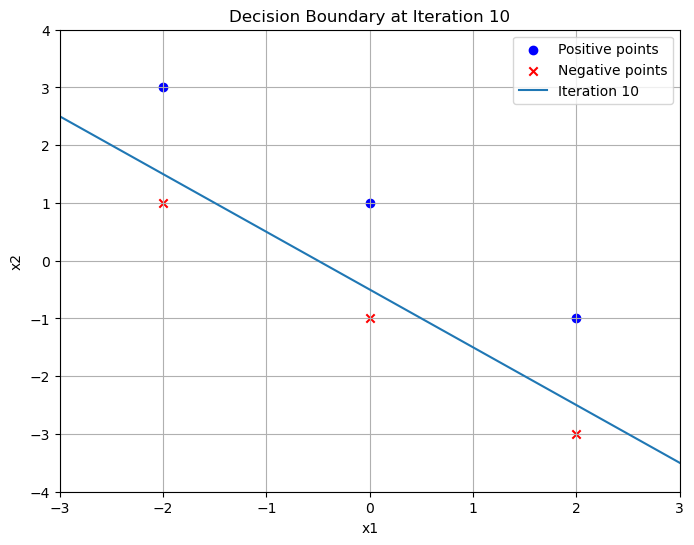

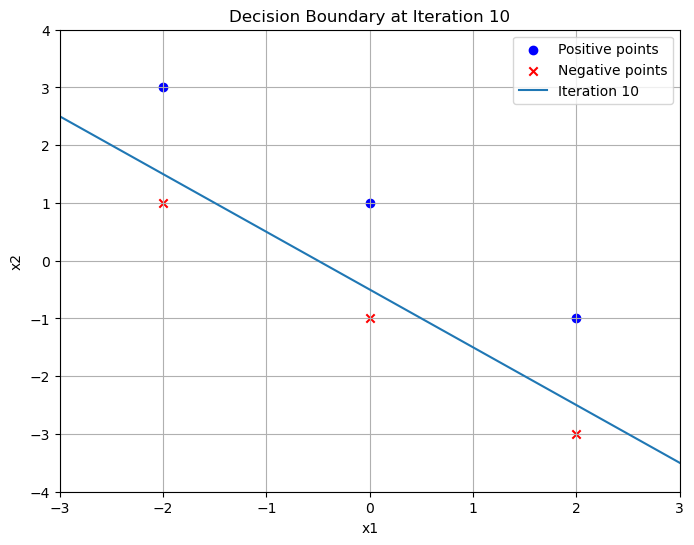

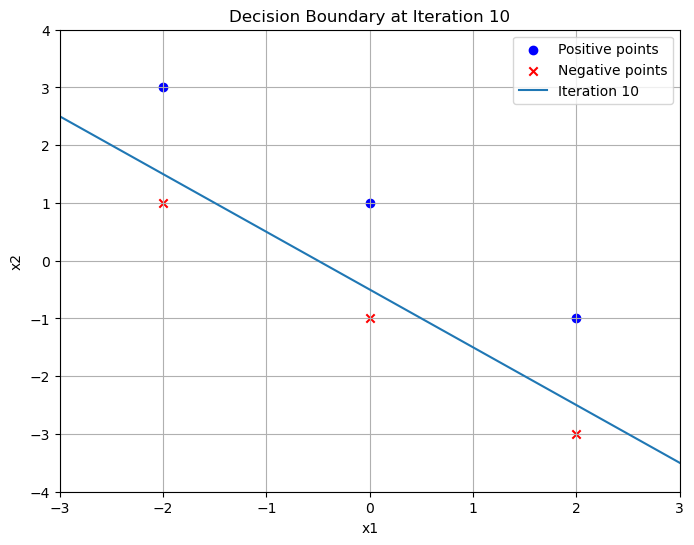

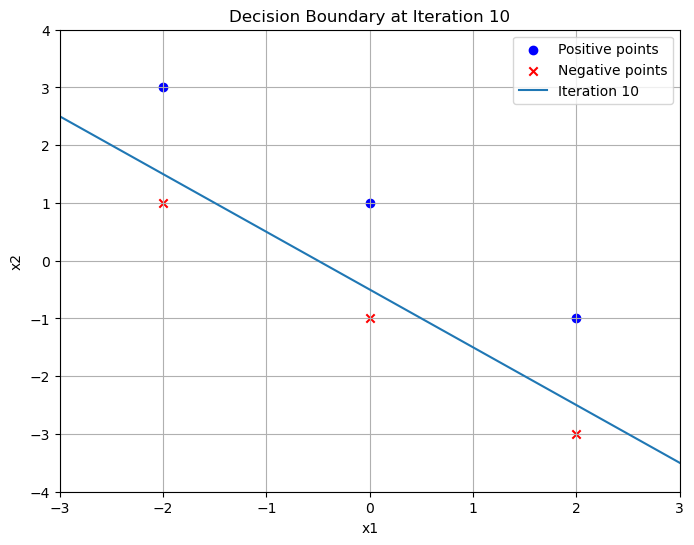

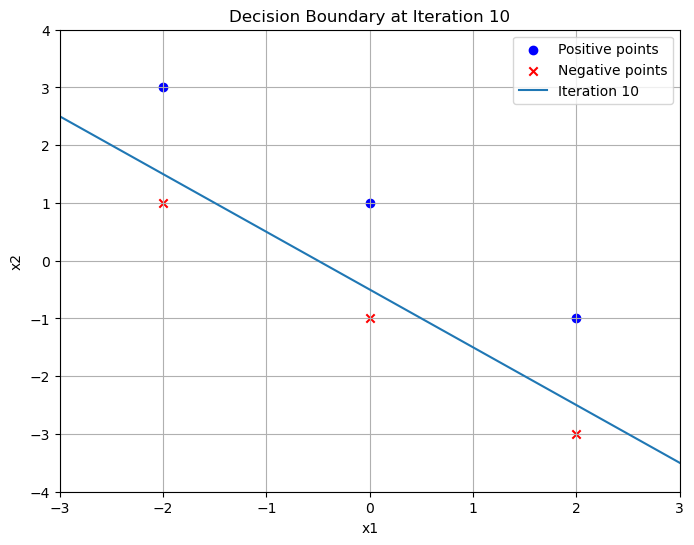

In [27]:
theta_final,theta0_final=perceptron(X,y,10)